In [21]:
import tensorflow as tf
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

add = tf.add(a,b)
mul = tf.multiply(a,b)

with tf.Session() as sess:
    print ("Addition with variables: %i" % sess.run(add, feed_dict={a: 2, b: 3}))
    print ("multiply result is %i" % sess.run(mul, feed_dict={a:9, b:10}))


Addition with variables: 5
multiply result is 90


In [17]:
import tensorflow as tf
a = tf.constant(19)
b = tf.constant(10)
c = a*b
sess = tf.Session()

print(sess.run(c))


190


Epoch: 0001 cost= 0.087430350 W= 0.254786 b= 0.634437
Epoch: 0051 cost= 0.078441933 W= 0.271102 b= 0.64674
Epoch: 0101 cost= 0.078272678 W= 0.269823 b= 0.655941
Epoch: 0151 cost= 0.078123048 W= 0.26862 b= 0.664594
Epoch: 0201 cost= 0.077990800 W= 0.267488 b= 0.672735
Epoch: 0251 cost= 0.077873878 W= 0.266424 b= 0.680391
Epoch: 0301 cost= 0.077770561 W= 0.265423 b= 0.687592
Epoch: 0351 cost= 0.077679239 W= 0.264481 b= 0.694364
Epoch: 0401 cost= 0.077598549 W= 0.263596 b= 0.700735
Epoch: 0451 cost= 0.077527225 W= 0.262763 b= 0.706725
Epoch: 0501 cost= 0.077464208 W= 0.26198 b= 0.712361
Epoch: 0551 cost= 0.077408522 W= 0.261243 b= 0.71766
Epoch: 0601 cost= 0.077359341 W= 0.26055 b= 0.722645
Epoch: 0651 cost= 0.077315874 W= 0.259899 b= 0.727334
Epoch: 0701 cost= 0.077277496 W= 0.259286 b= 0.731743
Epoch: 0751 cost= 0.077243596 W= 0.258709 b= 0.73589
Epoch: 0801 cost= 0.077213652 W= 0.258167 b= 0.739792
Epoch: 0851 cost= 0.077187203 W= 0.257657 b= 0.74346
Epoch: 0901 cost= 0.077163860 W= 0.

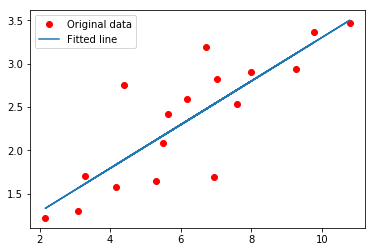

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

#parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 50

train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
nsamples = train_X.shape[0]

#tf graph input
X = tf.placeholder("float")
Y = tf.placeholder("float")

#create moudel
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

activation = tf.add(tf.multiply(X,W),b)

cost = tf.reduce_sum(tf.pow(activation-Y, 2))/(2*nsamples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        for (x,y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
    
        if epoch % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, Y:train_Y})), "W=", sess.run(W), "b=", sess.run(b))
    print ("Optimization Finished!")
    print( "cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), "W=", sess.run(W), "b=", sess.run(b))
    
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()


In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

data_x = np.linspace(1,8, 100)[:, np.newaxis]
data_y = np.polyval([1,-14, 59, -70], data_x)\
        + 1.5*np.sin(data_x)+np.random.randn(100, 1)

model_order = 5
data_x = np.power(data_x, range(model_order))
data_x /= np.max(data_x, axis=0)

order = np.random.permutation(len(data_x))
portion = 20
test_x = data_x[order[:portion]]
test_y = data_y[order[:portion]]
train_x = data_x[order[portion:]]
train_y = data_y[order[portion:]]

with tf.name_scope("IO"):
    inputs = tf.placeholder(tf.float32, [None, model_order], name="X")
    outputs = tf.placeholder(tf.float32, [None, 1], name="Yhat")
    
with tf.name_scope("LR"):
    W = tf.Variable(tf.zeros([model_order, 1], dtype=tf.float32), name="W")
    y = tf.matmul(inputs, W)
    
with tf.name_scope("train"):
    learning_rate = tf.Variable(0.5, trainable=False)
    cost_op = tf.reduce_mean(tf.pow(y-outputs, 2))
    train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_op)
    
tolerance = 1e-3

epochs = 1
last_cost = 0
alpha = 0.4
max_epochs = 20000

sess = tf.Session()
with sess.as_default():
    init = tf.global_variables_initializer()
    sess.run(init)
    sess.run(tf.assign(learning_rate, alpha))
    while True:
        sess.run(train_op, feed_dict={inputs: train_x, outputs: train_y})
        if epochs%500 == 0:
            cost = sess.run(cost_op, feed_dict={inputs: train_x, outputs: train_y})
            print("Epochs %d - Error %.4f"%(epochs, cost))
            
            if abs(last_cost - cost) < tolerance or epochs > max_epochs:
                print("Converged!")
                break
            last_cost = cost
        
        epochs += 1
        
    w = W.eval()
    print("w =",w)
    print("Test cost =", sess.run(cost_op, feed_dict={inputs: test_x, outputs: test_y}))

Epochs 500 - Error 39.3976
Epochs 1000 - Error 35.6667
Epochs 1500 - Error 32.3132
Epochs 2000 - Error 29.2967
Epochs 2500 - Error 26.5834
Epochs 3000 - Error 24.1427
Epochs 3500 - Error 21.9472
Epochs 4000 - Error 19.9724
Epochs 4500 - Error 18.1959
Epochs 5000 - Error 16.5980
Epochs 5500 - Error 15.1605
Epochs 6000 - Error 13.8675
Epochs 6500 - Error 12.7043
Epochs 7000 - Error 11.6580
Epochs 7500 - Error 10.7167
Epochs 8000 - Error 9.8699
Epochs 8500 - Error 9.1082
Epochs 9000 - Error 8.4229
Epochs 9500 - Error 7.8063
Epochs 10000 - Error 7.2517
Epochs 10500 - Error 6.7527
Epochs 11000 - Error 6.3037
Epochs 11500 - Error 5.8998
Epochs 12000 - Error 5.5363
Epochs 12500 - Error 5.2093
Epochs 13000 - Error 4.9151
Epochs 13500 - Error 4.6503
Epochs 14000 - Error 4.4120
Epochs 14500 - Error 4.1976
Epochs 15000 - Error 4.0046
Epochs 15500 - Error 3.8309
Epochs 16000 - Error 3.6745
Epochs 16500 - Error 3.5337
Epochs 17000 - Error 3.4070
Epochs 17500 - Error 3.2929
Epochs 18000 - Error 3.19